In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [4]:
df.shape

(1067, 13)

In [5]:
# setting our predictor and predicted variables
X = np.array(df[["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]])
Y = np.array(df["CO2EMISSIONS"])
X

array([[ 9.9,  6.7,  8.5, 33. ],
       [11.2,  7.7,  9.6, 29. ],
       [ 6. ,  5.8,  5.9, 48. ],
       ...,
       [13.4,  9.8, 11.8, 24. ],
       [12.9,  9.3, 11.3, 25. ],
       [14.9, 10.2, 12.8, 22. ]])

Performing data standardization

In [6]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.82855772, -0.99334135, -0.88430407,  0.87855306],
       [-0.5114328 , -0.63532912, -0.5685715 ,  0.34273362],
       [-1.77993246, -1.31555236, -1.63058106,  2.88787597],
       [-0.14551944, -0.13411199, -0.13802708, -0.19308583],
       [-0.29188478, -0.27731688, -0.28154188,  0.0748239 ],
       [-0.34067323, -0.63532912, -0.45375965,  0.20877876],
       [-0.36506745, -0.49212422, -0.42505669,  0.20877876],
       [-0.12112521, -0.16991321, -0.13802708, -0.19308583],
       [ 0.02524013,  0.00909291,  0.00548773, -0.32704069],
       [-0.65779815, -0.70693156, -0.68338334,  0.61064334]])

Dividing the dataset into training set and test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)
X_train.shape

(853, 4)

## K Nearest Neighbor (KNN)

Developing model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# training the model
k = 1
knn =KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [35]:
# predicting
yhat = knn.predict(X_test)
yhat[0:10]

array([274, 200, 196, 161, 320, 224, 163, 189, 221, 182], dtype=int64)

### Accuracy evaluation

In [36]:
from sklearn import metrics
print("Train set accuracy", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set accuracy", metrics.accuracy_score(Y_test, knn.predict(X_test)))

Train set accuracy 0.9859320046893317
Test set accuracy 0.7570093457943925


Visualizing using a distibution plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


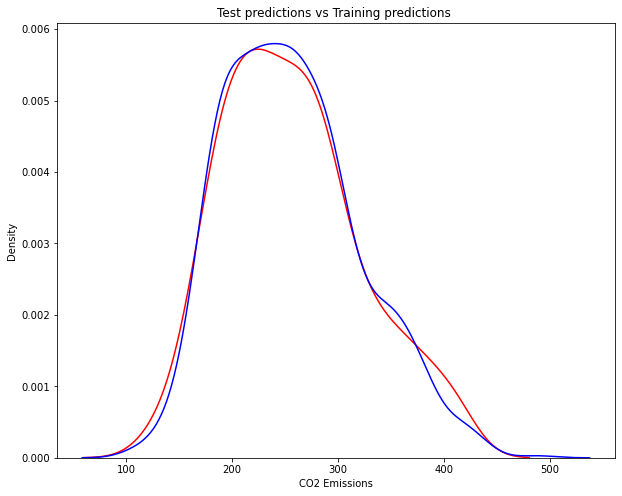

In [38]:
plt.figure(figsize = (10, 8))
ax1 = sns.distplot(x = knn.predict(X_test), color = "r", hist = False, label = "Test predictions")
sns.distplot(x = knn.predict(X_train), hist = False, color = "b", label = "Training predictions", ax = ax1)
plt.title("Test predictions vs Training predictions ")
plt.xlabel("CO2 Emissions")
plt.show()